# 世界の最新の感染者数

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
del df["Lat"]
del df["Long"]

In [3]:
df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838
1,NaN,Albania,0,0,0,0,0,0,0,0,...,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727
4,NaN,Angola,0,0,0,0,0,0,0,0,...,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551


In [4]:
latest_date = df.tail(1).columns[-1]
latest_date

'5/31/21'

In [5]:
latest_column_key = df.columns[-1]
latest_column_key2 = df.columns[-2]
df = df[['Province/State','Country/Region',latest_column_key2,latest_column_key]]
df = df.rename(columns={latest_column_key:"latest_confirmed"})
df = df.rename(columns={latest_column_key2:"latest_confirmed2"})
df["new_confirmed"] = df.latest_confirmed - df.latest_confirmed2
df.head()

,Province/State,Country/Region,latest_confirmed2,latest_confirmed,new_confirmed
0,NaN,Afghanistan,70761,71838,1077
1,NaN,Albania,132309,132315,6
2,NaN,Algeria,128725,128913,188
3,NaN,Andorra,13693,13727,34
4,NaN,Angola,34366,34551,185


## 全世界の最新の感染者数

In [6]:
print("全世界感染者数({}時点):{:,}人".format(latest_date,df["latest_confirmed"].sum()))
print("全世界感染者数平均({}時点):{:,}人".format(latest_date,df["latest_confirmed"].mean()))
print("全世界の新規感染者数({}時点):{:,}人".format(latest_date,df["new_confirmed"].sum()))
print("全世界の新規感染者数平均({}時点):{:,}人".format(latest_date,df["new_confirmed"].mean()))


全世界感染者数(5/31/21時点):170,721,104人
全世界感染者数平均(5/31/21時点):618,554.7246376812人
全世界の新規感染者数(5/31/21時点):378,494人
全世界の新規感染者数平均(5/31/21時点):1,371.355072463768人


## 国別の最新の感染者数

In [7]:
country = df.groupby(["Country/Region"],as_index=False).sum("latest_confirmed")
country = country.sort_values("latest_confirmed", ascending=False)

In [8]:
country.head()

,Country/Region,latest_confirmed2,latest_confirmed,new_confirmed
179,US,33258664,33264399,5735
79,India,28047534,28175044,127510
23,Brazil,16515120,16545554,30434
62,France,5728418,5728788,370
178,Turkey,5242911,5249404,6493


In [9]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [10]:
plt.figure(figsize=(9.5,5))
plt.title("Worst 50")
plt.xticks(rotation="90",fontsize=9)
plt.ylabel("count (1000 people)")
#fig.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.bar(country.head(50)["Country/Region"],country.head(50)["latest_confirmed"]/1000,label="positive")
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>

## ヒストグラム 

In [11]:
plt.figure(figsize=(10,5))
plt.title("histgram(million)")
#plt.xticks(rotation="90",fontsize=9)
#plt.ylabel("count (1000 people)")
#fig.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(country["latest_confirmed"]/1000000,bins=20)

<IPython.core.display.Javascript object>

(array([173.,   8.,   6.,   3.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([1.00000000e-06, 1.66322090e+00, 3.32644080e+00, 4.98966070e+00,
        6.65288060e+00, 8.31610050e+00, 9.97932040e+00, 1.16425403e+01,
        1.33057602e+01, 1.49689801e+01, 1.66322000e+01, 1.82954199e+01,
        1.99586398e+01, 2.16218597e+01, 2.32850796e+01, 2.49482995e+01,
        2.66115194e+01, 2.82747393e+01, 2.99379592e+01, 3.16011791e+01,
        3.32643990e+01]),
 <a list of 20 Patch objects>)

## 人口当たりの分析

In [12]:
pop = pd.read_excel("world-data/WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx",header=16)
pop.head(1)

,Index,Variant,"Region, subregion, country or area *",Notes,Country code,Type,Parent code,1950,1951,1952,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,Estimates,WORLD,NaN,900,World,0,2536431.018,2584034.227,2630861.69,...,7041194.168,7125827.957,7210582.041,7295290.759,7379796.967,7464021.934,7547858.9,7631091.113,7713468.205,7794798.729


In [13]:
pop.iloc[:,-1]

0      7794798.729
1              ...
2      1273304.261
3      6521494.468
4      1057438.163
          ...     
284         62.273
285      37742.157
286         56.772
287          5.795
288     331002.647
Name: 2020, Length: 289, dtype: object

In [14]:
pop_latest = pop.loc[pop["Type"]=="Country/Area"][[pop.columns[2],pop.columns[-1]]]

In [15]:
pop_latest.columns = ["country","population"]

In [16]:
pop_latest.head()

,country,population
26,Burundi,11890.781
27,Comoros,869.595
28,Djibouti,988.002
29,Eritrea,3546.427
30,Ethiopia,114963.583


In [17]:
country.head()

,Country/Region,latest_confirmed2,latest_confirmed,new_confirmed
179,US,33258664,33264399,5735
79,India,28047534,28175044,127510
23,Brazil,16515120,16545554,30434
62,France,5728418,5728788,370
178,Turkey,5242911,5249404,6493


### 世界全体での人口10万人あたり陽性者数

In [18]:
country.latest_confirmed.sum()

170721104

In [19]:
pop_latest.population.sum()

7794798.729

In [20]:
print("****世界全体での人口10万人あたり陽性者数:{}****".format(country.latest_confirmed.sum() / (pop_latest.population.sum() / 100)))

****世界全体での人口10万人あたり陽性者数:2190.1925878450734****


### 各国の人口１０万人あたり陽性者数

In [21]:
c_merged = pd.merge(country, pop_latest, left_on="Country/Region", right_on="country", how="left")
c_merged.loc[c_merged["country"].isna()]

,Country/Region,latest_confirmed2,latest_confirmed,new_confirmed,country,population
0,US,33258664,33264399,5735,NaN,NaN
5,Russia,5005171,5013512,8341,NaN,NaN
12,Iran,2902094,2913136,11042,NaN,NaN
51,Bolivia,368474,371279,2805,NaN,NaN
59,West Bank and Gaza,308048,308350,302,NaN,NaN
66,Moldova,255145,255186,41,NaN,NaN
72,Venezuela,232800,234165,1365,NaN,NaN
83,Burma,143571,143629,58,NaN,NaN
85,"Korea, South",140340,140799,459,NaN,NaN
91,Kosovo,106997,107002,5,NaN,NaN


In [22]:
p_merged = pd.merge(pop_latest, country, left_on="country", right_on="Country/Region", how="left")
len(p_merged.loc[p_merged["Country/Region"].isna()])

64

In [23]:
pop_latest.loc[pop_latest["country"].str.contains("Syria")]

,country,population
104,Syrian Arab Republic,17500.657


In [24]:
renames = {
    "US":"United States of America",
    "Russia":"Russian Federation",
    "Iran":"Iran (Islamic Republic of)",
    "Bolivia":"Bolivia (Plurinational State of)",
    "Moldova":"Republic of Moldova",
    "Venezuela":"Venezuela (Bolivarian Republic of)",
    "Korea, South":"Republic of Korea",
    "Congo (Kinshasa)":"Democratic Republic of the Congo",
    "Congo (Brazzaville)":"Congo",
    "Vietnam":"Viet Nam",
    "Laos":"Lao People's Democratic Republic",
    "Taiwan*":"China, Taiwan Province of China",
    "Tanzania":"United Republic of Tanzania",
    "Brunei":"Brunei Darussalam",
    "Micronesia":"Micronesia (Fed. States of)",
    "Syria":"Syrian Arab Republic",
}

In [25]:
country_renamed = country.copy()
country_renamed["Country/Region"].replace(renames,inplace=True)

In [26]:
c_merged = pd.merge(country_renamed, pop_latest, left_on="Country/Region", right_on="country", how="left")
c_merged.loc[c_merged["country"].isna()]

,Country/Region,latest_confirmed2,latest_confirmed,new_confirmed,country,population
59,West Bank and Gaza,308048,308350,302,NaN,NaN
83,Burma,143571,143629,58,NaN,NaN
91,Kosovo,106997,107002,5,NaN,NaN
111,Cote d'Ivoire,47233,47292,59,NaN,NaN
178,Diamond Princess,712,712,0,NaN,NaN
187,MS Zaandam,9,9,0,NaN,NaN


In [38]:
c_merged["positives per 1000 population"] = c_merged["latest_confirmed"] / (c_merged["population"])
c_merged["positives per 100,000 population"] = (c_merged["latest_confirmed"] / (c_merged["population"]/100)).astype(float)
c_merged["new positives per 100,000 population"] = (c_merged["new_confirmed"] / (c_merged["population"]/100)).astype(float)

In [39]:
c_merged = c_merged.sort_values("positives per 1000 population", ascending=False)

In [40]:
c_merged.loc[c_merged["Country/Region"]=="United States of America"]

,Country/Region,latest_confirmed2,latest_confirmed,new_confirmed,country,population,positives per 1000 population,"positives per 100,000 population","new positives per 100,000 population"
0,United States of America,33258664,33264399,5735,United States of America,331002.647,100.49587,10049.587005,1.732615


<IPython.core.display.Javascript object>


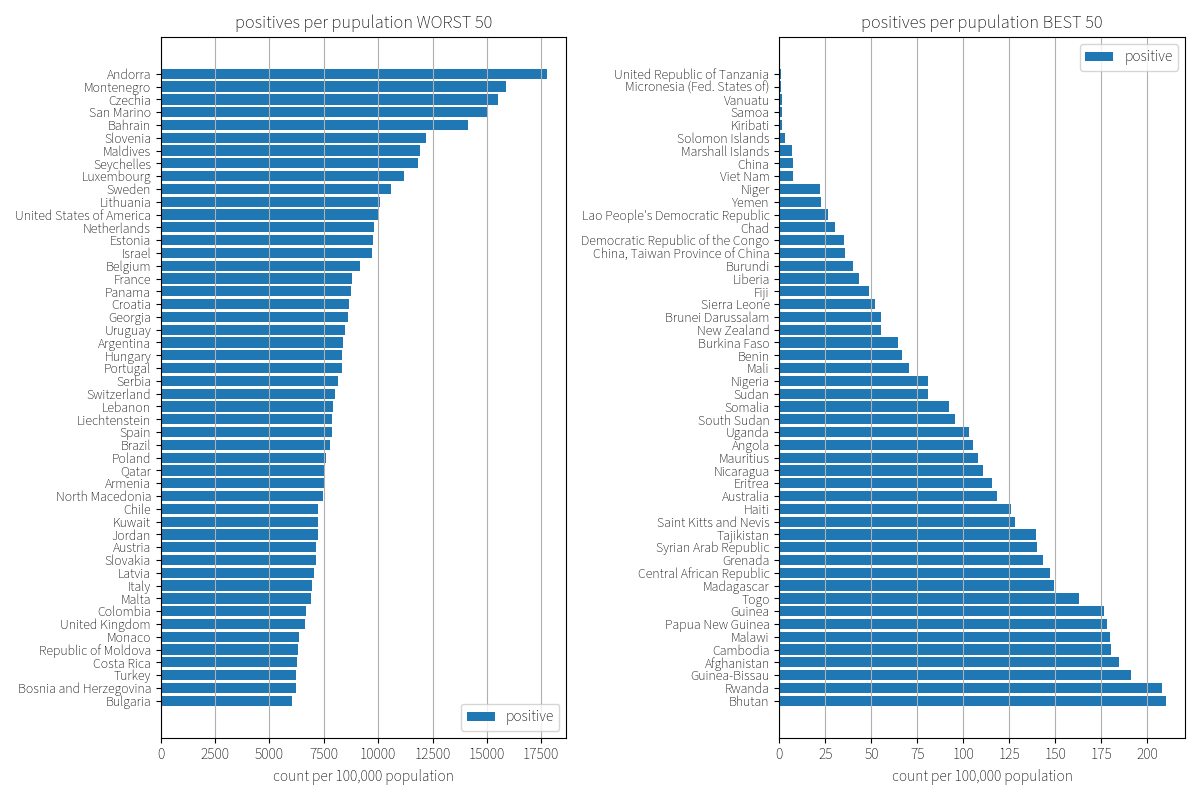

In [41]:
fig = plt.figure(figsize=(12,8))

plt.subplot(1,2,1) # (rows, columns, panel number)
plt.title("positives per pupulation WORST 50")
#plt.xticks(rotation="90",fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel("count per 100,000 population")
plt.grid(axis="x")
#fig.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
#plt.bar(c_merged.head(50)["Country/Region"],c_merged.head(50)["positives per 100,000 population"],label="positive")
chart_data=c_merged.head(50).sort_values("positives per 100,000 population",ascending=True)
plt.barh(chart_data["Country/Region"],chart_data["positives per 100,000 population"],label="positive")
#plt.text(0,chart_data["positives per 100,000 population"],chart_data["population"].astype(str))
#plt.text(0,chart_data["positives per 100,000 population"].all(),chart_data["population"].astype(str).all())
plt.legend()

plt.subplot(1,2,2) # (rows, columns, panel number)
plt.title("positives per pupulation BEST 50")
#plt.xticks(rotation="90",fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel("count per 100,000 population")
plt.grid(axis="x")
#fig.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
c_asc = c_merged.sort_values("positives per 1000 population")
chart_data=c_asc.head(50).sort_values("positives per 100,000 population",ascending=False)
plt.barh(chart_data["Country/Region"],chart_data["positives per 100,000 population"],label="positive")
plt.legend()

fig.tight_layout()


In [42]:
fig.savefig("out/covid-global-tops.png")

<IPython.core.display.Javascript object>


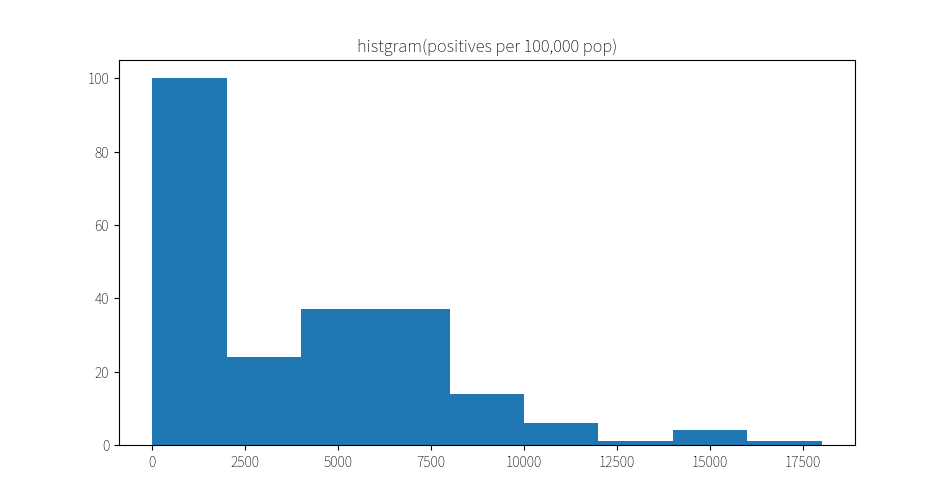

(array([100.,  24.,  37.,  14.,   6.,   1.,   4.,   1.]),
 array([    0,  2000,  4000,  8000, 10000, 12000, 14000, 16000, 18000]),
 <a list of 8 Patch objects>)

In [43]:
plt.figure(figsize=(9.5,5))
plt.title("histgram(positives per 100,000 pop)")
plt.hist(c_merged["positives per 100,000 population"],bins=[0,2000,4000,8000,10000,12000,14000,16000,18000])

In [44]:
c_merged.describe()

,latest_confirmed2,latest_confirmed,new_confirmed,"positives per 100,000 population","new positives per 100,000 population"
count,1.930000e+02,1.930000e+02,193.000000,187.000000,187.000000
mean,8.826042e+05,8.845653e+05,1961.108808,3380.010016,10.621525
std,3.427733e+06,3.434421e+06,9841.703786,3916.980626,39.548866
min,1.000000e+00,1.000000e+00,0.000000,0.852108,0.000000
25%,1.152800e+04,1.162100e+04,5.000000,187.950529,0.119258
50%,9.505000e+04,9.526300e+04,97.000000,1708.406842,1.145581
75%,3.938070e+05,3.944390e+05,927.000000,6243.010461,7.531817
max,3.325866e+07,3.326440e+07,127510.000000,17766.129554,484.034981


In [45]:
c_merged.head()

,Country/Region,latest_confirmed2,latest_confirmed,new_confirmed,country,population,positives per 1000 population,"positives per 100,000 population","new positives per 100,000 population"
137,Andorra,13693,13727,34,Andorra,77.265,177.661296,17766.129554,44.004400
95,Montenegro,99605,99623,18,Montenegro,628.062,158.61969,15861.969041,2.865959
20,Czechia,1661159,1661272,113,Czechia,10708.982,155.128844,15512.884418,1.055189
159,San Marino,5089,5090,1,San Marino,33.938,149.979374,14997.937415,2.946550
70,Bahrain,238156,240531,2375,Bahrain,1701.583,141.357195,14135.719504,139.575913


In [47]:
c_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 137 to 187
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country/Region                        193 non-null    object 
 1   latest_confirmed2                     193 non-null    int64  
 2   latest_confirmed                      193 non-null    int64  
 3   new_confirmed                         193 non-null    int64  
 4   country                               187 non-null    object 
 5   population                            187 non-null    object 
 6   positives per 1000 population         187 non-null    object 
 7   positives per 100,000 population      187 non-null    float64
 8   new positives per 100,000 population  187 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 15.1+ KB


<IPython.core.display.Javascript object>


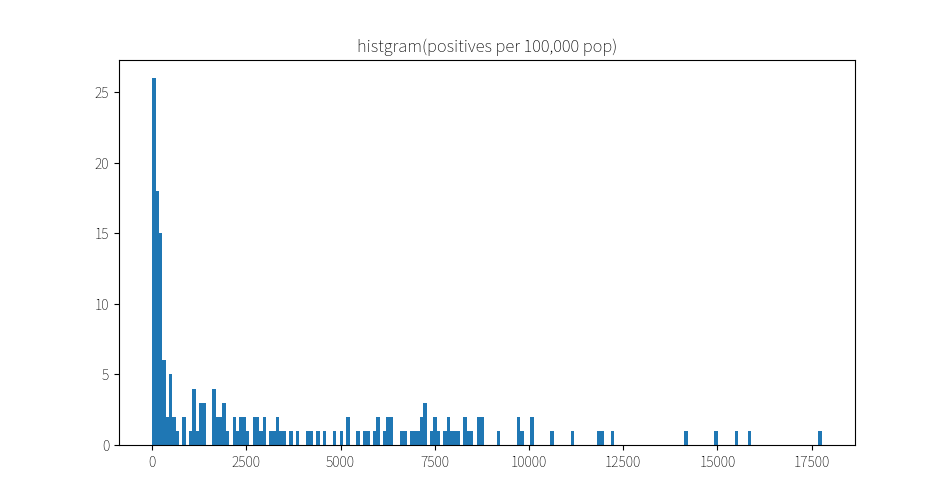

/home/masaru/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/masaru/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([26., 18., 15.,  6.,  2.,  5.,  2.,  1.,  0.,  2.,  0.,  1.,  4.,
         1.,  3.,  3.,  0.,  0.,  4.,  2.,  2.,  3.,  1.,  0.,  2.,  1.,
         2.,  2.,  1.,  0.,  2.,  2.,  1.,  2.,  0.,  1.,  1.,  2.,  1.,
         1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,
         0.,  0.,  1.,  0.,  1.,  0.,  2.,  0.,  0.,  1.,  0.,  1.,  1.,
         0.,  1.,  2.,  0.,  1.,  2.,  2.,  0.,  0.,  1.,  1.,  0.,  1.,
         1.,  1.,  2.,  3.,  0.,  1.,  2.,  1.,  0.,  1.,  2.,  1.,  1.,
         1.,  0.,  2.,  1.,  1.,  0.,  2.,  2.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.

In [48]:
plt.figure(figsize=(9.5,5))
plt.title("histgram(positives per 100,000 pop)")
plt.hist(c_merged["positives per 100,000 population"],bins=200)

## 新規感染者数

<IPython.core.display.Javascript object>


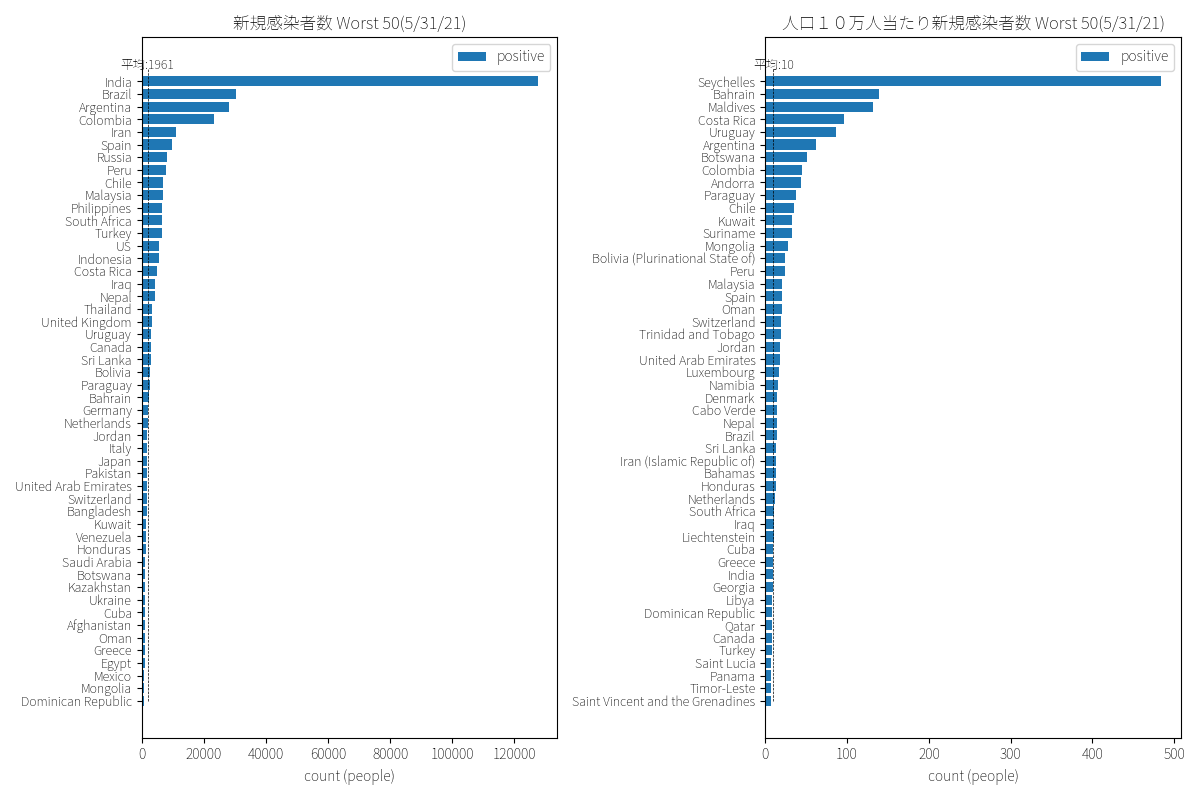

In [55]:
fig = plt.figure(figsize=(12,8))

plt.subplot(1,2,1) # (rows, columns, panel number)
plt.title("新規感染者数 Worst 50({})".format(latest_date))
plt.yticks(fontsize=9)
plt.xlabel("count (people)")
chart_data = country.sort_values("new_confirmed",ascending=False).head(50).sort_values("new_confirmed",ascending=True)
plt.barh(chart_data["Country/Region"],chart_data["new_confirmed"],label="positive")
mean = int(country.new_confirmed.mean())
plt.plot([mean,mean],[0,50], 'k--', lw=0.5)
plt.text(mean,50,"平均:{}".format(mean),ha="center",fontsize=9)
plt.legend()

plt.subplot(1,2,2) # (rows, columns, panel number)
plt.title("人口１０万人当たり新規感染者数 Worst 50({})".format(latest_date))
plt.yticks(fontsize=9)
plt.xlabel("count (people)")
chart_data = c_merged.sort_values("new positives per 100,000 population",ascending=False).head(50).sort_values("new positives per 100,000 population",ascending=True)
plt.barh(chart_data["Country/Region"],chart_data["new positives per 100,000 population"],label="positive")
mean = int(c_merged["new positives per 100,000 population"].mean())
plt.plot([mean,mean],[0,50], 'k--', lw=0.5)
plt.text(mean,50,"平均:{}".format(mean),ha="center",fontsize=9)
plt.legend()


fig.tight_layout()

In [56]:
fig.savefig("out/covid-global-new-positives-latest-top.png")